Actividad 2: Sergio Buitrago
Materia: Diplomado de Analisis de datos con Python
1. Importando libreria pandas, cargando fuentes de datos y haciendo analisis descriptivo
Fuente de información: 'https://api.covidtracking.com/v1/us/daily.json'

Resumen DataSet: Web Api, de los registros de informacion sobre las personas contagiadas de covid-19.


1. Cargamos la fuente de informacion que vamos a usar y guardamos los resultados en la variable df.

In [56]:
url = 'https://api.covidtracking.com/v1/us/daily.json'
df = pd.read_json(url)

2. Cargamos la librerias que vamos a usar en el proyecto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.groupby import groupby
import datetime

In [284]:
df.head(2)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,new_date,value
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83,2021-03-07,1
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0,2021-03-06,1


3. Creamos una nueva variable con la fecha organizada, ya que estaba en formato int.

In [60]:
df['new_date'] = pd.to_datetime(df['date'], format='%Y%m%d')

##Analisis descriptivo

### primero queremos saber cuantos han sido los maximos muertos por covid 19 en la fuente de datos

In [63]:
max = df['death'].max()
max

515151.0

Teniendo en cuenta el numero de muertos maximos nos gustaria identificar como a sido el comportamiento desde el inicio de la pandemia y cual es el tiempo del dataset.

In [68]:
date_start = df['new_date'].min()
date_end = df['new_date'].max()
print('Esta fuente de informacion comienza desde %s hasta %s '%(date_start,date_end))

Esta fuente de informacion comienza desde 2020-01-13 00:00:00 hasta 2021-03-07 00:00:00 


# Graficos Analiticos

Usando la libreria matplotlib











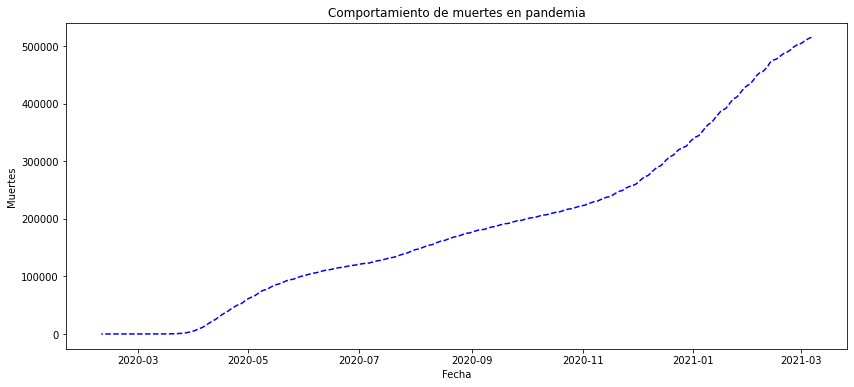

In [166]:
plt.figure(figsize=(14,6))

plt.plot(df['new_date'], df['death'], linestyle='--', color='b')
plt.xlabel('Fecha')
plt.ylabel('Muertes')
plt.title('Comportamiento de muertes en pandemia')

plt.show()

Podemos ver que en la grafica, el crecimiento de las muertes por covid 19 como se fue incrementando y donde fueron los picos, como de noviembre 2020 a marzo 2021

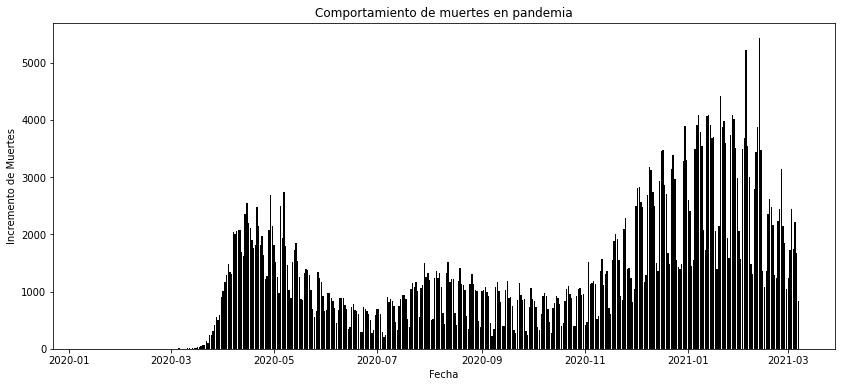

In [89]:
plt.figure(figsize=(14,6))

plt.bar(df['new_date'], df['deathIncrease'],  color='black')
plt.xlabel('Fecha')
plt.ylabel('Incremento de Muertes')
plt.title('Tendencia de muertes en pandemia')

plt.show()

Vemos en la figura dos, como fue la tendencia de muertes de covid en la pandemia y como crecieron fueron crecimiendo a inicios del 2021

In [206]:
##estados = df['states'].value_counts().sort_values(ascending=False)
df['value'] = 1 
prueba = df.groupby(['states'])[['value']].sum()
datos_pie = prueba.sort_values(by = 'value', ascending=False).head(5)

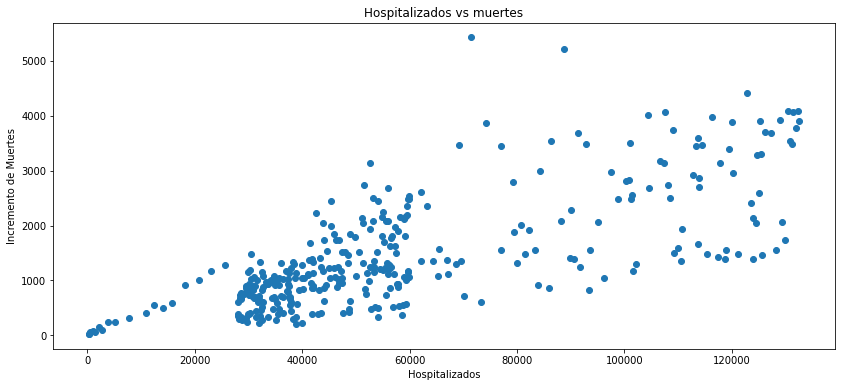

In [235]:
plt.figure(figsize=(14,6))
plt.scatter(df['hospitalizedCurrently'], df['deathIncrease'])
plt.ylabel('Incremento de Muertes')
plt.xlabel('Hospitalizados')
plt.title('Hospitalizados vs muertes')
plt.show()

Vemos en el grafico, que las dos variables se corelacionan, entre mas crece el numero de hospitalizados mas crecen las muertes, aunque tambien tenemos que tenemos dos puntos que se salen del promedio donde el numero de muertes fue mucho mayor a los hospitalizados 

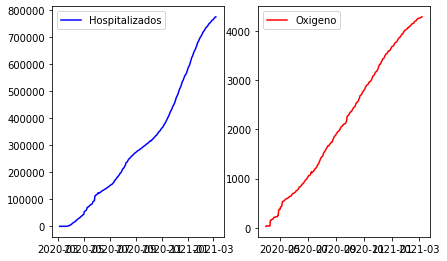

In [266]:
fig, ax = plt.subplots(1,2)

ax[0].plot(df['new_date'], df['hospitalized'], color='b', label='Hospitalizados')
ax[0].legend()

ax[1].plot(df['new_date'], df['onVentilatorCumulative'], color='r', label='Oxigeno')
ax[1].legend()

plt.subplots_adjust(left=0.025,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

Este grafico nos permite coparar el numero de graficos que necesitemos, en este caso vemos que aunque las lineas se comportan de forma parecido, los numeros tiene una diferencia muy grande lo que nos lleva a la conclusion que aunque los hospitalizados van en aumento y fueron muchos, solo el 2% tenia de los hospitalizados se les colocaba oxigeno.

#Libreria 2: Pairplot


In [267]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


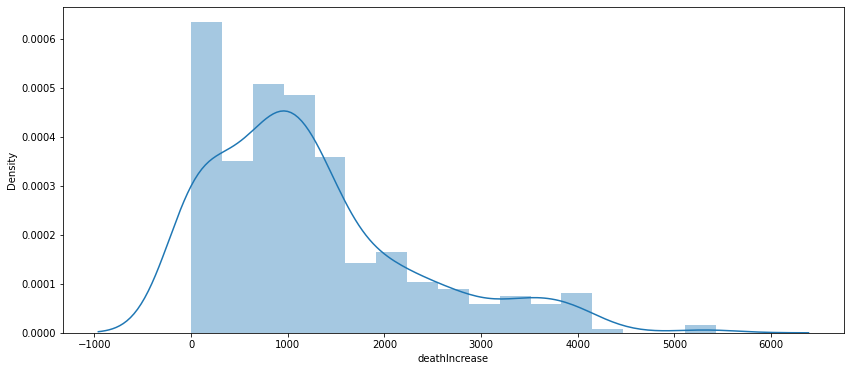

In [272]:
plt.figure(figsize=(14,6))
ax=sns.distplot(df['deathIncrease'])

Con el siguiente hisograma podemos ver donde esta la densidad de incrementos de muertes donde mas se mantuvo fue en los 1000 muertes.

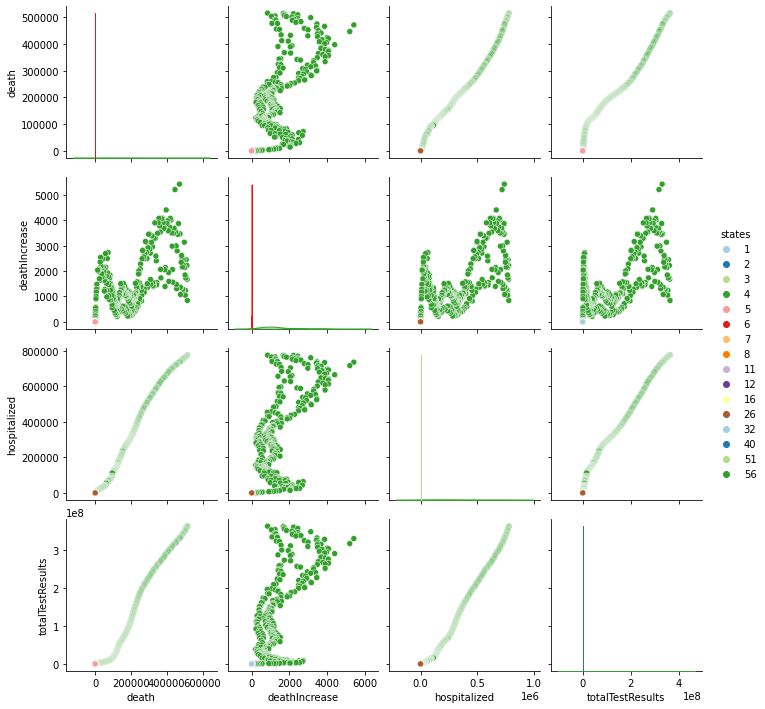

In [273]:
variables = ['death', 'deathIncrease', 'hospitalized' , 'totalTestResults']
sns.pairplot(df,vars=variables,hue='states',palette='Paired')

Vemos en el grafico, entre mas crecen los datos mas estados se van metiendo al analisis, pero tenemos un analisis de mas del 99% con 56 estados de EEUU.

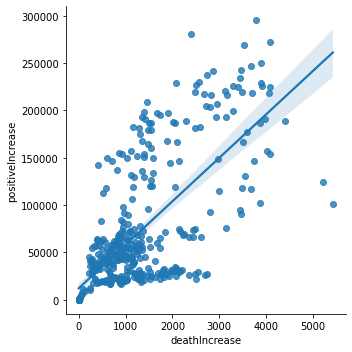

In [282]:
g=sns.lmplot(x='deathIncrease', y='positiveIncrease', data=df,palette='Set1')

Podemos ver que las variables no se relacionan, aunque a mayor numero de contagios mayor muerte, no crecen en la misma proporcion.

Como conclucion, las graficas nos permiten entender de una mejora manera los datos que tenemos en nuestros data frame y nos permiten hacer analisis de informacion para generar insight de valor.